In [32]:
from __future__ import division
%pylab inline --no-import-all
import mpld3
mpld3.enable_notebook()
plt.style.use('bmh')
import mmf_setup;mmf_setup.nbinit()

<IPython.core.display.Javascript object>

$$
\newcommand{\d}{\mathrm{d}}
\newcommand{\pdiff}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
\newcommand{\diff}[3][]{\frac{\d^{#1} #2}{\d {#3}^{#1}}}
$$

# Table of Contents
* [1. Background](#1.-Background)
	* [1.1 Units](#1.1-Units)
	* [1.2 Thermodynamics](#1.2-Thermodynamics)
* [2. Homogenous Nuclear Matter](#2.-Homogenous-Nuclear-Matter)
	* [2.1 Electric Neutrality](#2.1-Electric-Neutrality)
	* [2.2 Chemical (Beta) Equilibrium](#2.2-Chemical-%28Beta%29-Equilibrium)
		* [2.2.1 Energy "Gap"](#2.2.1-Energy-"Gap")
		* [2.2.2 Equilibrium with Nuclear Matter](#2.2.2-Equilibrium-with-Nuclear-Matter)
		* [2.2.3 Energy-per-Particle and Chemical Potentials](#2.2.3-Energy-per-Particle-and-Chemical-Potentials)
		* [2.2.4 Pressure](#2.2.4-Pressure)
* [3. Neutron Star Equation of State](#3.-Neutron-Star-Equation-of-State)
* [4. Saturation](#4.-Saturation)
	* [4.1 Thermodynamic Equilibrium](#4.1-Thermodynamic-Equilibrium)
	* [4.2 Coulomb Interaction](#4.2-Coulomb-Interaction)
* [5. Surface Energy](#5.-Surface-Energy)
* [6. Liquid Drop Model (LDM)](#6.-Liquid-Drop-Model-%28LDM%29)
* [7. Problems](#7.-Problems)
	* [7.1 Collapse of the Earth](#7.1-Collapse-of-the-Earth)


# 1. Background

## 1.1 Units

In the following, we shall generally adopt "natural" units in which we choose our physical scales of length, time, temperature, mass, and charge to match the system under consideration making some of the dimensionful physical constants assume unit value.  In particular:

* $k_B = 1$: The Boltzmann constant $k_B$ simply serves to convert energies to temperatures $E=k_BT$.  By setting this to unity, we simply choose to measure temperatures in energy units (i.e. eV, MeV, or GeV in this context).  Thus, if you see a "temperature" of 1MeV, simply divide by $k_B$ to obtain $10^{10}$K.
* $c = 1$: Since we will be dealing with relativistic energy scales, we can express all masses in terms of energy using Einstein's famous relationship $E=mc^2$.  For nuclear physics this is extremely convenient.  For example, an electron has a mass of 511keV.  This means that if an electron annihilates with a positron producing two photons, each photon will also have an energy of 511keV conserving the total mass-energy of the system.  Nucleons (protons and neutrons) are about 1GeV ($m_p \approx 0.938$GeV and $m_n \approx 0.940$GeV.  Note that the neutron is heavier allowing it to decay into a proton, electron and anti-neutrino.  Were the proton more massive, then they could decay into neutrons and all the earth would collapse... see below.)
* $\hbar = 1$: This is another common convention that allows one to relate energy and frequency, or momentum and distance.
* $\epsilon_0=1$: This is often used for convenience when discussing electromagnetism.

In addition, one sometimes specifies the mass scale:

* $m=1$: In some cases - such as discussing a single species - it is useful to use a natural mass unit which is the mass of the principle species.  Here, however, we shall not adopt this convention since we discuss particles of several different masses.

Note: Since there are only 5 fundamental dimensions, one may only specify 5 dimensionful constants such as discussed above.  These are not the only choices - when discussing the TOV equations for the structure of neutron stars for example, one might like to set $G=1$ (replacing $\hbar=1$) and express masses in terms of solar masses $M_\circ = 1$.  In this case, one must release some of the previous constraints.

On the other hand, dimensionless constants such as $2\pi$ or $\alpha$ can never be adjusted unless they can be absorbed into a unit redefinition.  For our purposes, the relevant dimensionless quantity is the fine-structure constant:

$$
  \alpha = \frac{e^2}{4\pi\epsilon_0 \hbar c} = \frac{1}{137.035999139(31)}.
$$

## 1.2 Thermodynamics

Here we present a brief review of the required thermodynamics for this problem.

Our starting point is the Helmholtz free energy $F = E - TS$.  For a given quantum system with fixed boundary conditions (i.e. volume) and number of particles, this can be calculated from the spectrum (energy eigenvalues) of the system:

$$
  \DeclareMathOperator{\Tr}{Tr}
  e^{-\beta F} = \sum_{n} e^{-\beta E_n} = \sum_{n} e^{-E_n/k_B T}, \qquad
  F = -k_B T \ln \sum_{n} e^{-E_n/k_B T} = -k_B T \ln \Tr e^{-\op{H}/k_BT},
$$

where $\beta = k_B/T$ and $k_B$ is the Boltzmann constant and $T$ is the temperature.  In the last step we have expressed this directly in terms of the Hamiltonian $\op{H}$ of the system.  For an explanation of this result, see Schrödinger's book [Statistical Thermodynamics](http://www.amazon.com/Statistical-Thermodynamics-Erwin-Schrodinger/dp/0486661016).  Briefly, it comes from considering an arbitrary distribution (mixed state) over a complete set of states $\{\ket{n}\}$ which can be expressed in terms of a density matrix $\mat{R}$:

$$
  \op{R} = \op{R}^\dagger = \sum_n\ket{n}f_n\bra{n}, \qquad
  \Tr\op{R} = \sum f_n = N, \qquad
$$

Formally, the equilibrium ensemble can be found by choosing $\mat{R}$ to maximum the number of configurations with a given energy $E = \braket{\op{H}}_{\op{R}} = \Tr(\op{H}\op{R})$ -- this corresponds to the most probable configuration as discussed in Schrödinger's book.  The entropy provides a measure of the (log of the) number of configurations:

$$
  S = \Tr\mat{R}\ln\mat{R} = -\sum_n f_n \ln f_n.
$$

To implement this constrained extremization, we introduce the energy constraint with a Lagrange multiplier $\beta$ which will later be interpreted as the inverse temperature $\beta = 1/k_B T$.

$$
  \max_{\op{R}} S[\op{R}] - \beta (\braket{\op{H}}_{\op{R}} - E) - \lambda(\Tr\op{R} - N).
$$

Performing the variation with respect to $\op{R}^T$ we obtain the following solution, where we have eliminated $\lambda$ to satisfy the normalization constraint, but left the Lagrange multiplier $\beta$ in place of the energy:

$$
  -\ln \mat{R} - (1+\alpha)\op{1} - \beta \op{H} = 0, \qquad 
  \Tr\op{R} = N, \qquad
  \op{Z} = e^{-\beta\op{H}}, \qquad
  \op{R} = N\frac{\op{Z}}{\Tr \op{Z}}.
$$

The quantity $\op{Z}$ is referred to as the "partition function" and the Helmholtz free energy is expressed in terms of this:

$$
  F = -k_B T \ln \Tr\op{Z} = E - TS.
$$

Here we will work at $T=0$, in which case $F=E$ and we will follow the convention of working with the energy $E$ rather than the free energy $F$.

*This should be expanded with some intuitive discussions added, perhaps some plots of the Legendre transform etc.*

For extensive systems, it is convenient to work with two intrinsic quantities: the energy density $\mathcal{E}$ and energy per particle $\varepsilon$.  From these we may express the chemical potential $\mu$ and pressure $P$:

$$
  n = \frac{N}{V}, \qquad 
  \mathcal{E} = \frac{E}{V}, \qquad
  \varepsilon = \frac{E}{N} = \frac{\mathcal{E}}{n},\\
  \mu = \pdiff{E}{N} = \pdiff{\mathcal{E}}{n}, \qquad
  P = - \frac{\Omega}{V} = \frac{\mu N - E}{V} = \mu n - \mathcal{E} = n^2\pdiff{\varepsilon}{n}.
$$

# 2. Homogenous Nuclear Matter

## 2.1 Electric Neutrality

We start by discussing homogeneous nuclear matter comprising neutrons and protons, along with leptons – electrons and possibly muons – required to maintain electrical neutrality.  Bulk matter must overall be electrically neutral otherwise the energy of the system will not be extensive and will be huge.

We start by modeling the leptons as a free Fermi gas filling all states up the the Fermi surface which has Fermi momentum $p_F = \hbar k_F$.  Here we consider a single component (for example spin-up electrons). The densities and chemical potentials involved will be sufficiently large that we must consider relativistic effects.  The energy of a (plane wave) state with momentum $p=\hbar k$ is:

$$
  E(k) = \sqrt{p^2c^2 + m^2 c^4} = \sqrt{\hbar^2c^2 k^2 + m^2 c^4}.
$$

The density of the Fermi gas is thus obtained by counting all states in the Fermi sphere and the energy density is obtained by integrating $E(k)$ over the same region:

$$
  n = \int_{k<k_F} 1 \frac{\d^3{k}}{(2\pi)^3} = \int_0^{k_F} \frac{4\pi k^2}{8\pi^3}
    = \frac{k_F^3}{6\pi^2}, \qquad
  \mathcal{E} = \int_{k<k_F} E(k)\frac{\d^3{k}}{(2\pi)^3} 
              = \int_0^{k_F} \sqrt{\hbar^2c^2 k^2 + m^2 c^4}\frac{k^2}{2\pi^2}\d{k}
$$

In neutron stars, the lepton chemical potential $\mu_e \sim \hbar c k_F \approx 10$ – $100$MeV $\gg m_ec^2 = 511$keV.  Thus, as a first approximation, we can take the ultra-relativistic limit and assume that $0 \approx mc^2 \ll \mu_l$.  This simplifies the integrals and we obtain:

\begin{equation}
  \mathcal{E} = \hbar c\int_0^{k_F} \frac{k^3}{2\pi^2}\d{k} = \hbar c\frac{k_F^4}{8\pi^2}.
  \tag{ultra-relativistic}
\end{equation}

For comparison, in the non-relativistic limit (such as in solid-state physics), one has $mc^2 \ll \mu_e$ so that $\sqrt{\hbar^2c^2 k^2 + m^2 c^4} \approx mc^2 + \hbar^2k^2/2m + \order(\mu/mc^2)^2$ so that

\begin{equation}
  \mathcal{E} = \int_0^{k_F} \left(
    mc^2 + \frac{\hbar^2k^2}{2m}\right)\frac{k^2}{2\pi^2}\d{k} 
  = mc^2 n + \hbar^2\frac{k_F^5}{20 m\pi^2}.
  \tag{non-relativistic}
\end{equation}

In natural units, $m=c=\hbar=1$, the full integral is:

$$
  \int_0^{k_F} \sqrt{k^2 + 1}\frac{k^2}{2\pi^2}\d{k}
    = \frac{(2k_F^2 + 1)k_F\sqrt{k_F^2+1} + \ln\left(\sqrt{k_F^2 + 1} - k_F\right)}{16\pi^2} 
    \approx \frac{k_F^4}{8\pi^2}.
$$

**Exercise: Use dimensional analysis to argue that the following result is correct including the omitted factors.**

$$
  \mathcal{E} = 
  \frac{m^4c^5}{\hbar^3}
  \frac{\left(2\frac{\hbar^2k_F^2}{m^2c^2}+1\right)\frac{\hbar k_F}{mc}\sqrt{\frac{\hbar^2k_F^2}{m^2c^2} + 1} 
    + \ln\left(\sqrt{\frac{\hbar^2k_F^2}{m^2c^2} + 1} - \frac{\hbar k_F}{mc}\right)}{16\pi^2} 
    \approx \frac{\hbar c k_F^4}{8\pi^2}
$$

where in the last equation, we have assumed that $mc^2 \ll \hbar^2k_F^2$ so that the mass term can be neglected.  In neutron stars, $E(k_F) = \mu_e \sim 10-100$MeV which is large compared with the mass of the electron $m_ec^2 \approx 511$keV$ \approx 0.5$MeV, but not compared with the mass of the lightest muon $m_\mu c^2 \approx 100$MeV.

Here we check these results numerically:

Populating the interactive namespace from numpy and matplotlib


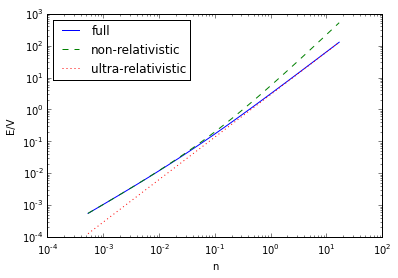

In [31]:
%pylab inline --no-import-all
hbar = 1.0
c = 1.0
m = 1.0
k_unit = m*c/hbar           # Nature k unit
n_unit = k_unit**3          # Natural density unit
E_unit = m*c**2/n_unit      # Natural energy-density unit
kFs = 10**np.linspace(-0.5, 1, 100)*k_unit
ns = kFs**3/6/np.pi**2
E_NR = m*c**2*ns + hbar**2*kFs**5/20/m/np.pi**2
E_UR = hbar*c*kFs**4/8/np.pi**2
_k = kFs*hbar/m/c           # Dimensionless k_F
_mu = np.sqrt(_k**2 + 1)    # Dimensioness 
E = m**4*c**5/hbar**3 * ((2*_k**2 + 1)*_k*_mu + np.log(_mu - _k))/16/np.pi**2
plt.plot(ns/n_unit, E/E_unit, label='full')
plt.plot(ns/n_unit, E_NR/E_unit, '--', label='non-relativistic', scaley=False)
plt.loglog(ns/n_unit, E_UR/E_unit, ':', label='ultra-relativistic', scaley=False)
plt.xlabel('n');plt.ylabel('E/V');plt.legend(loc='best')

Electrons and muons come with two spins, so to each of these equations we must add a degeneracy factor $g=2$ so that the final result is:

$$
  n = \frac{k_F^3}{3\pi^2}, \qquad
  \mu_e = \sqrt{\hbar^2k_F^2c^2 + m^2c^4} \approx \hbar c k_F, \qquad
  k_F = \sqrt{\frac{\mu_e^2}{\hbar^2c^2} - \frac{m^2c^2}{\hbar^2}}
      \approx \frac{\mu_e}{\hbar c}, \\
  \mathcal{E} = 
  \frac{m^4c^5}{\hbar^3}
  \frac{\left(2\frac{\hbar^2k_F^2}{m^2c^2}+1\right)\frac{\hbar k_F}{mc}\sqrt{\frac{\hbar^2k_F^2}{m^2c^2} + 1} 
    + \ln\left(\sqrt{\frac{\hbar^2k_F^2}{m^2c^2} + 1} - \frac{\hbar k_F}{mc}\right)}{16\pi^2} 
    \approx \frac{\hbar c k_F^4}{4\pi^2}
$$

Solving these equations gives the energy-density of the (non-interacting) electron gas $\mathcal{E}_e(n_p)$ and muon gas $\mathcal{E}_\mu(n_\mu)$.  Explicitly, for the electrons, when the approximations can be made, we have:

$$
  \mathcal{E}_e(n_e) = \frac{\hbar c (3\pi^2n_e)^{4/3}}{4\pi^2}, \qquad
  \mu_e = \pdiff{\mathcal{E}_e(n_e)}{n_e} = 
  \frac{4}{3}\frac{\mathcal{E}_e(n_e)}{n_e} 
  = \hbar c (3\pi^2n_e)^{1/3} = \hbar c k_F.
$$

*Note that the thermodynamic relationships are satisfied (by construction).*

## 2.2 Chemical (Beta) Equilibrium

Physically, charge neutrality is maintained by $\beta$ decay, inverse $\beta$ decau, and muon decay processes:

\begin{gather}
  n \rightarrow p^{+} + e^{-} + \bar{\nu}_{e}, \tag{$\beta$-decay}\\
  p^{+} + e^{-} \rightarrow n + \nu_{e}, \tag{inverse $\beta$-decay}\\
  \mu^{-} \rightarrow e^{-} + \bar{\nu}_{e} + \nu_{\mu}. \tag{muon-decay}
\end{gather}

*Note that each reaction conserves electric charge, baryon charge, and lepton number.*

Charge neutrality demands that the lepton number density equal the proton density:

$$
  n_p = n_e + n_\mu = n_l. \tag{charge neutrality}
$$

Now consider the total lepton density $n_l$ as being fixed by nuclear physics (we will relax this in a moment).  What electron fraction $x = n_e/n_l$ will minimize the energy density of the lepton gas:

$$
  \mathcal{E}_l(n_l, x) = \mathcal{E}_e(n_e) + \mathcal{E}_\mu(n_\mu)
                        = \mathcal{E}_e(xn_l) + \mathcal{E}_\mu\bigl((1-x)n_l\bigr).
$$

Minimizing with respect to the electron fraction gives the equilibrium condition:

$$
  \pdiff{\mathcal{E}_l(n_l, x)}{x} = 0 = n_l\mathcal{E}_e'(n_e) - n_l\mathcal{E}_\mu'(n_\mu), \\
  \qquad \mu_e = \mu_\mu. \tag{chemical equilibrium}
$$

I.e. chemical equilibrium is achieved (via the muon-decay process) when the chemical potentials of the two species are equal.  For a fixed lepton chemical potential $\mu_l = \mu_e = \mu_\mu$, we thus have the following total lepton density:

$$
  n_l \approx \begin{cases}
    \frac{\mu_e^3}{3\pi^2\hbar^3c^3} & \mu_e < m_\mu c^2,\\
    \frac{\mu_e^3}{3\pi^2\hbar^3c^3}\left(1 + \left(1 - \frac{m_\mu^2 c^4}{\mu_e^2}\right)^{3/2}\right)
    &  \mu_e > m_\mu c^2,
  \end{cases}
$$

where the first form contains only electrons.

### 2.2.1 Energy "Gap"

What exactly does the previous expression mean?  If $\mu_e < m_\mu c^2$, then there are no muons in the system, but the muonic equation of state does not appear to have a solution.  What happens here is that the muonic spectrum has a "gap" (or more appropriately a "mass gap" in this case).  For $-m_\mu c^2 < \mu < m_\mu c^2$ the muonic system stays in the same state – namely the vaccuum state $n_\mu = 0$.  This is denoted by kink in the equation of state:

Populating the interactive namespace from numpy and matplotlib


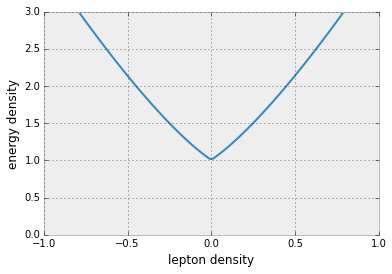

In [2]:
from __future__ import division
%pylab inline --no-import-all
import mpld3
mpld3.enable_notebook()
plt.style.use('bmh')

def E_mu(n):
    """T=0 muon equation of state.  (Assumes m=hbar=c=1)"""
    kF = (3*np.pi**2*abs(n))**(1./3.)
    s = np.sqrt(kF**2 + 1)
    return 1 + (2*kF*s**3 - np.log(kF + s))/8/np.pi**2
    
n = np.linspace(-1,1,100)
plt.plot(n, E_mu(n))
plt.xlabel('lepton density')
plt.ylabel('energy density')
plt.ylim(0, 3);

The chemical potential $\mu = \mathcal{E}'(n)$ is the slope here.  The kink at $n=0$ implies that there is a range of chemical potentials over which the state does not change.  This is the manifestation of a gap in the thermodynamic functions.  To actually see the "gap" look at the single-particle energy spectrum $\mu = E(k)$:

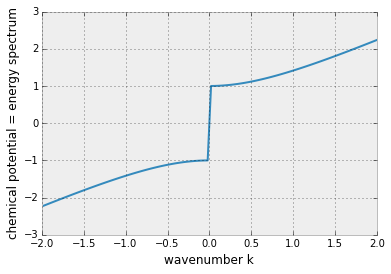

In [3]:
k = np.linspace(-2,2,100)
Ek = np.sign(k)*np.sqrt(k**2 + 1)
plt.plot(k, Ek)
plt.xlabel("wavenumber k")
plt.ylabel(r"chemical potential = energy spectrum")

The origin of this kink and gap is the zero-temperature limit $T=0$.  For any finite temperature, one must be more careful and populate the various states with the appropriate Fermi distribution function that includes both particles and anti-particles:

$$
  f_k = \frac{1}{1 + e^{\beta (E_k - \mu)}} - \frac{1}{1 + e^{\beta (E_k + \mu)}}, \qquad
  n = \int f_k \frac{\d^3{k}}{(2\pi)^3}, \qquad
  \mathcal{E} = \int f_k E_k \frac{\d^3{k}}{(2\pi)^3}.
$$

These results can be expressed in terms of the Fermi-Dirac integrals and indeed smooth out the equation of state replacing the kink and gap with smooth functions over the energy scale $1/\beta = k_B T$:

In [7]:
import holoviews as hv
hv.notebook_extension()

:HoloMap   [T,mu]
   :Curve   [$k$]   ($f(k)$)
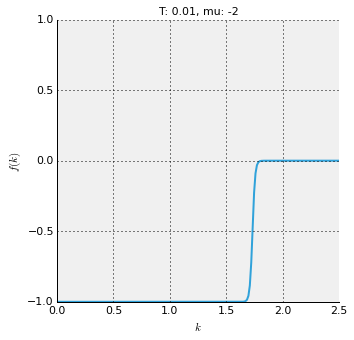
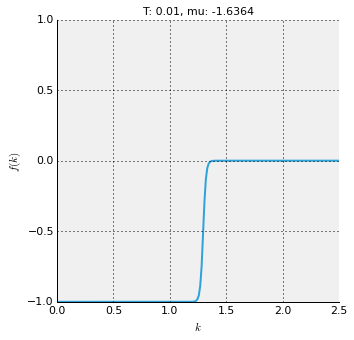
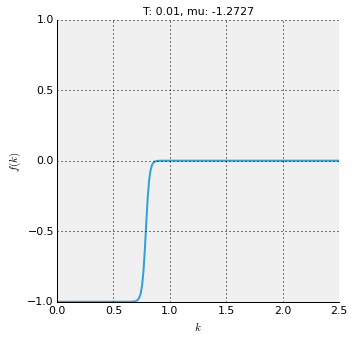
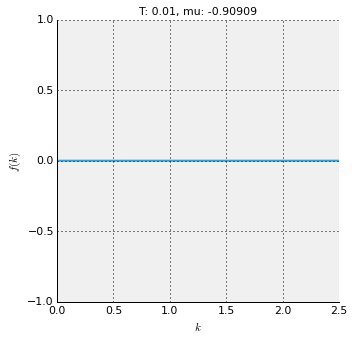
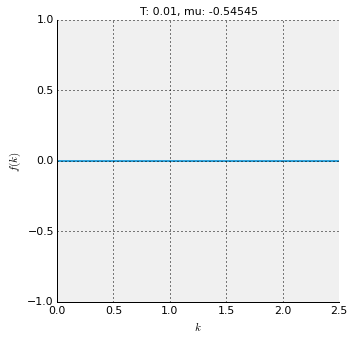
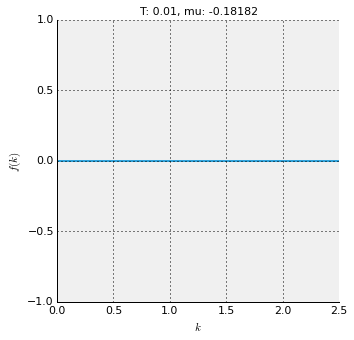
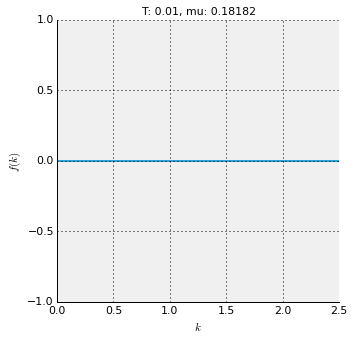
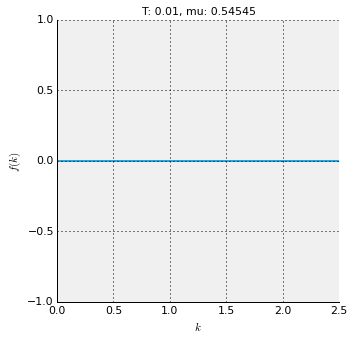
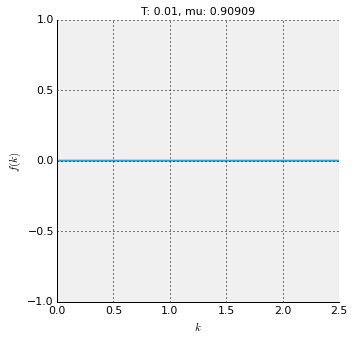
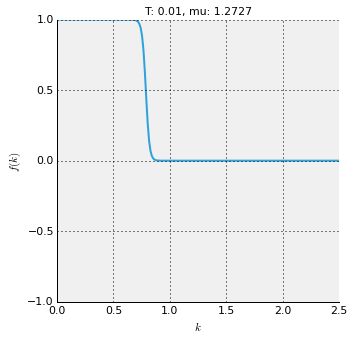
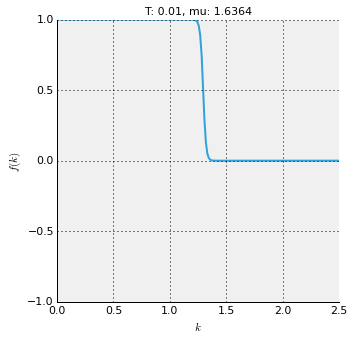
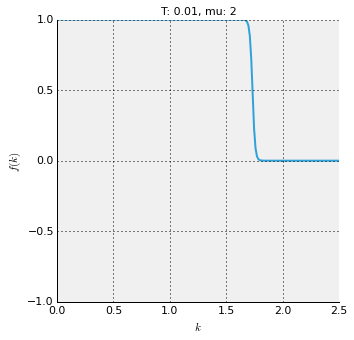
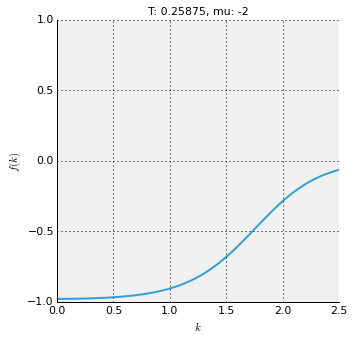
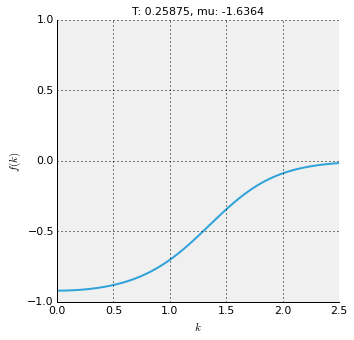
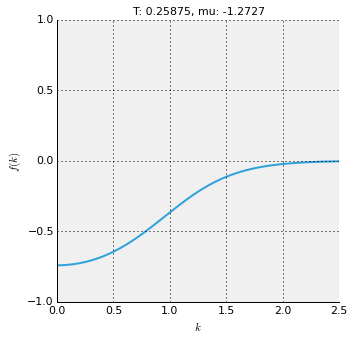
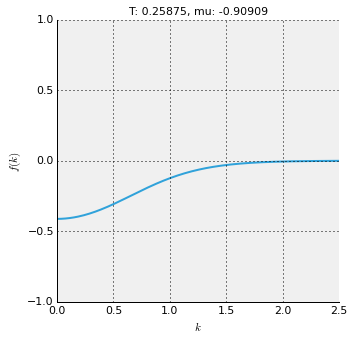
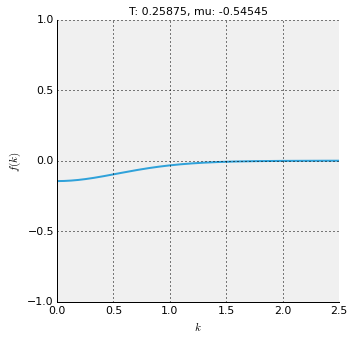
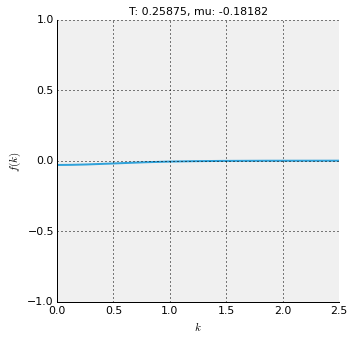
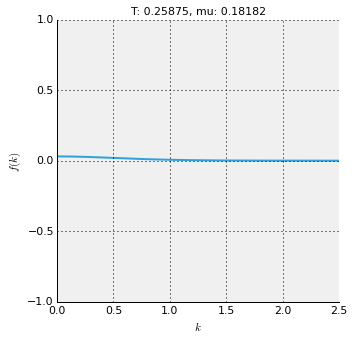
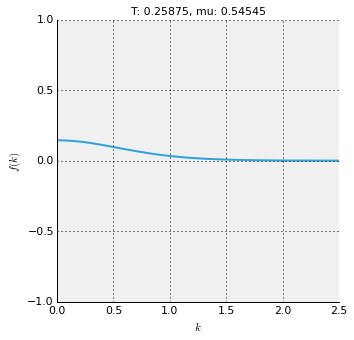
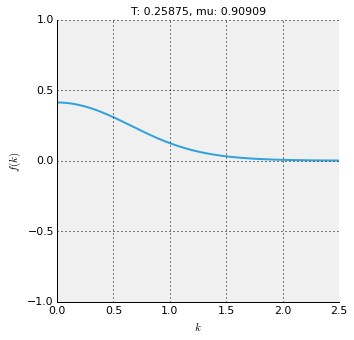
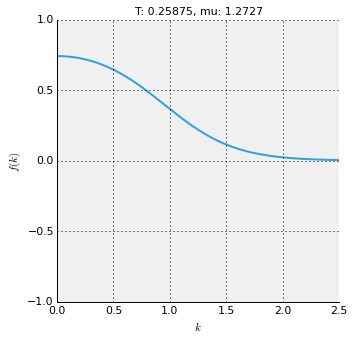
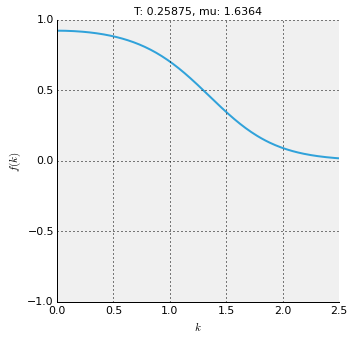
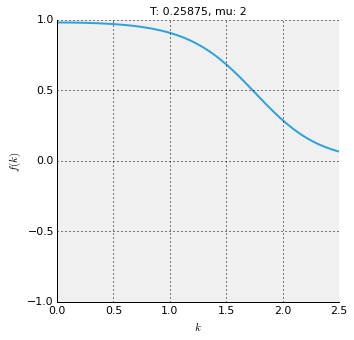
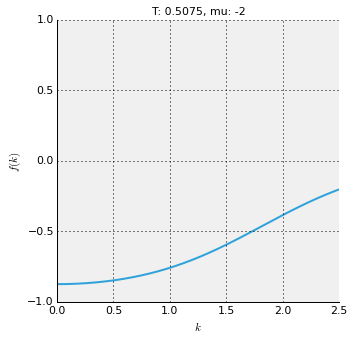
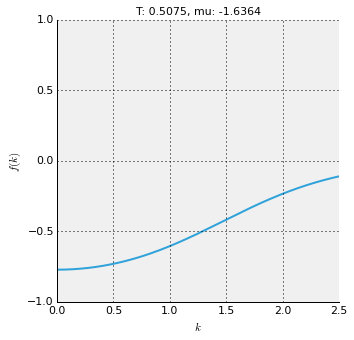
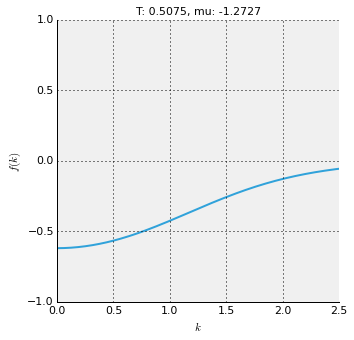
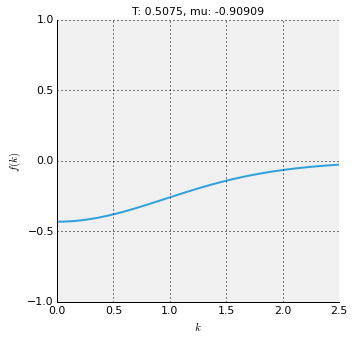
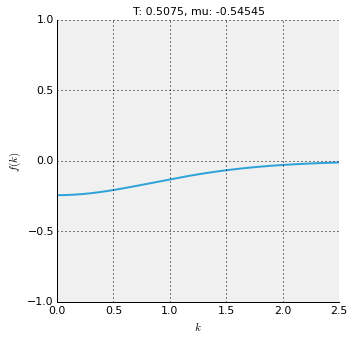
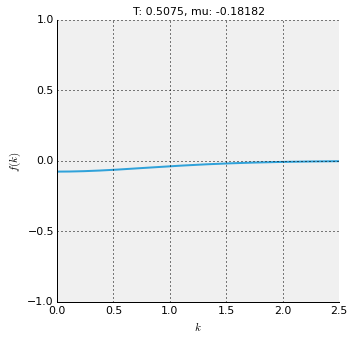
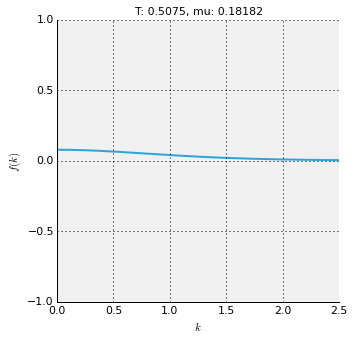
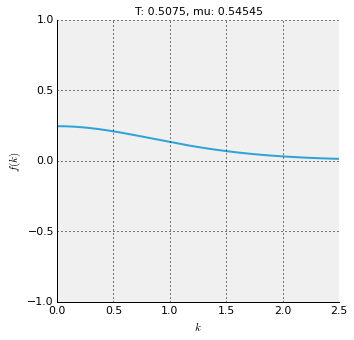
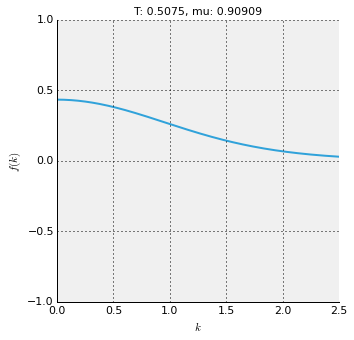
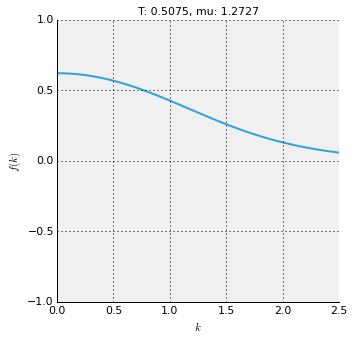
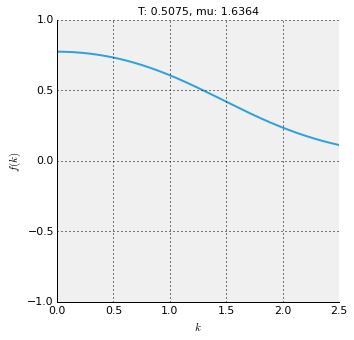
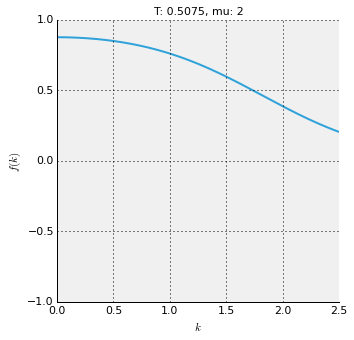
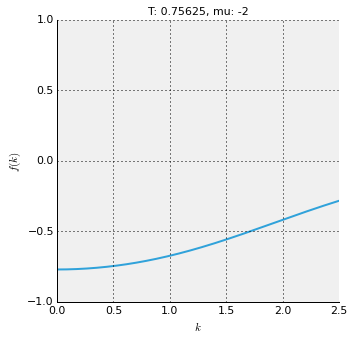
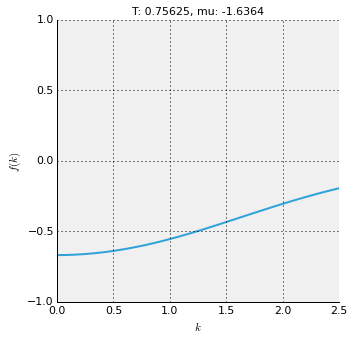
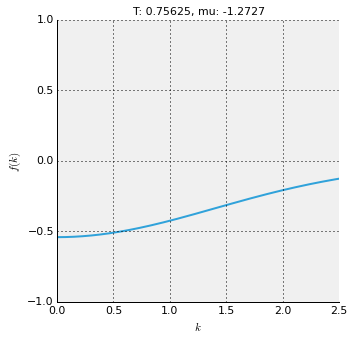
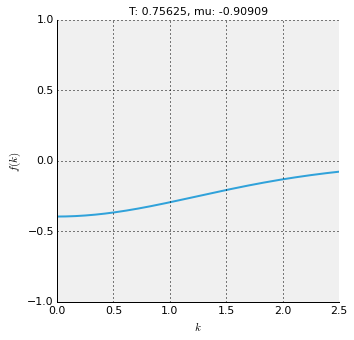
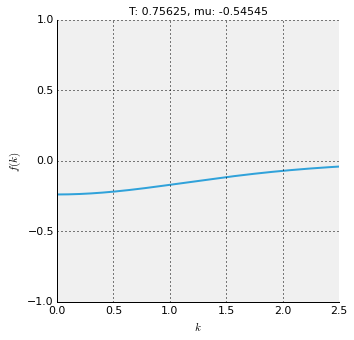
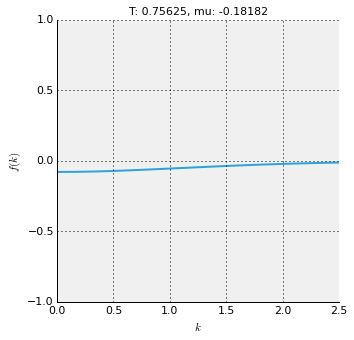
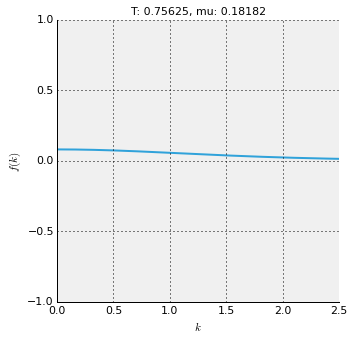
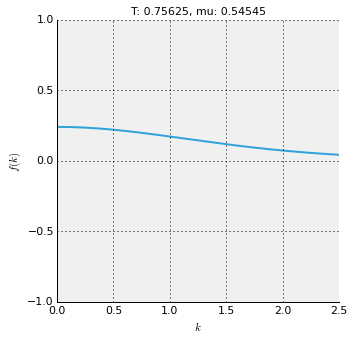
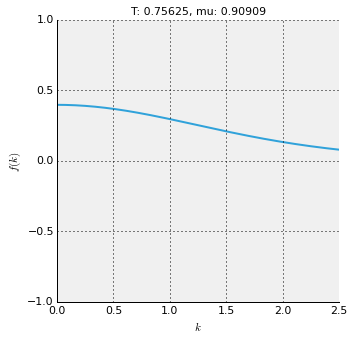
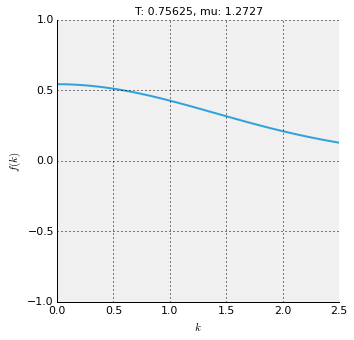
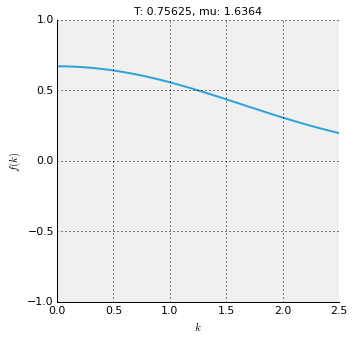
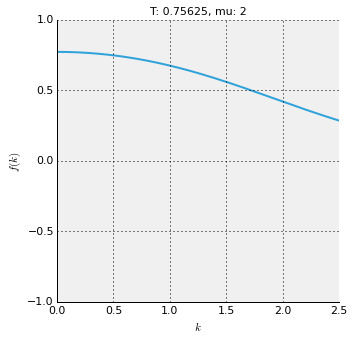
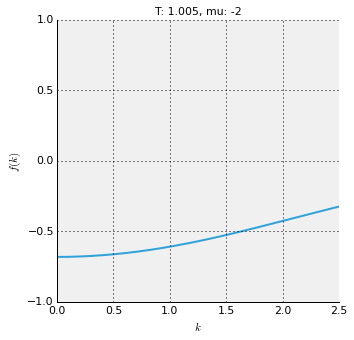
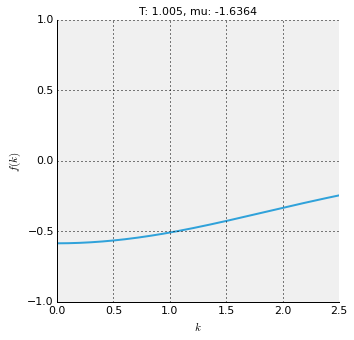
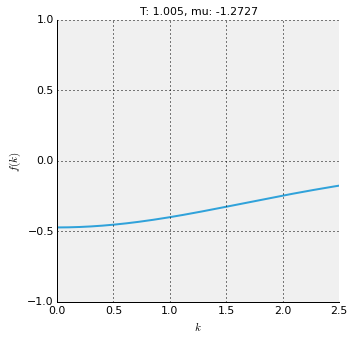
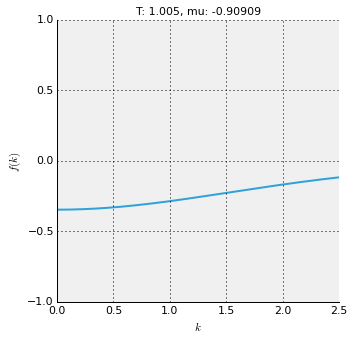
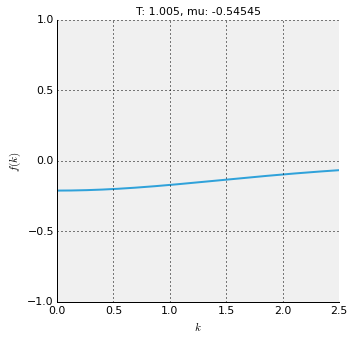
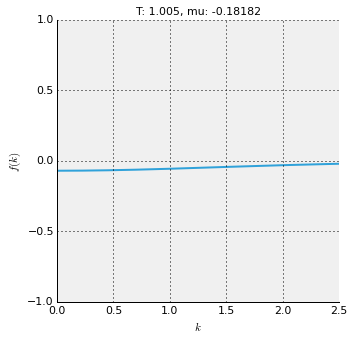
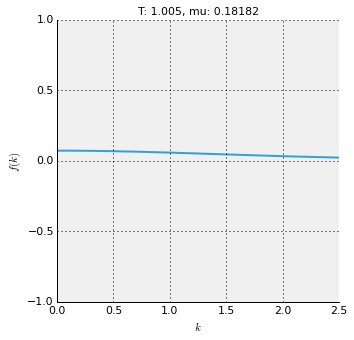
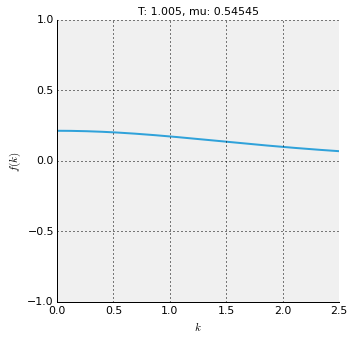
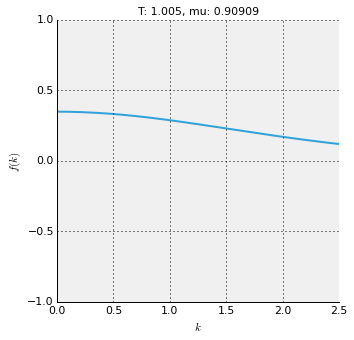
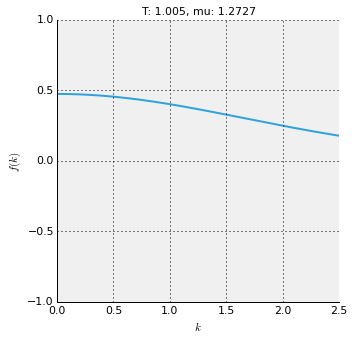
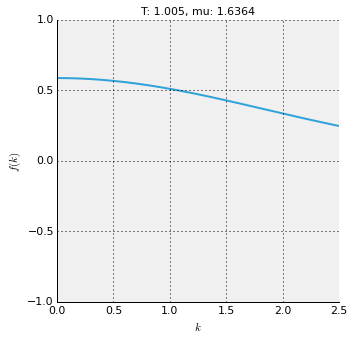
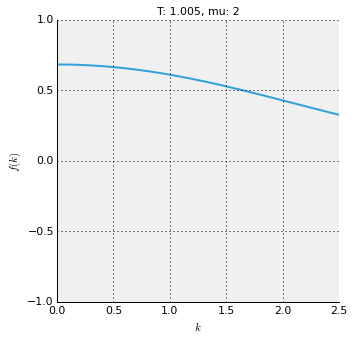
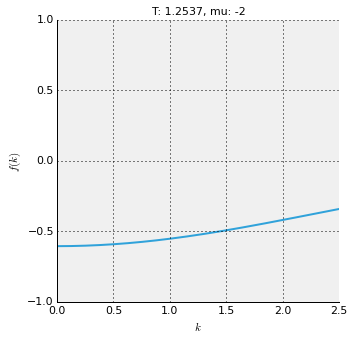
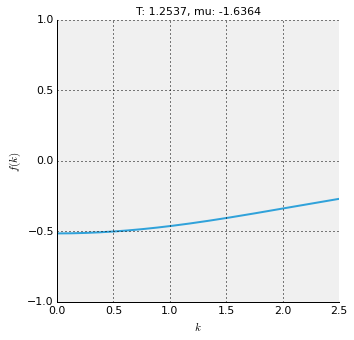
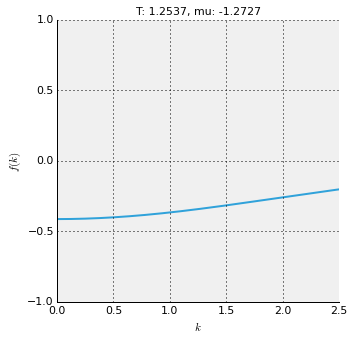
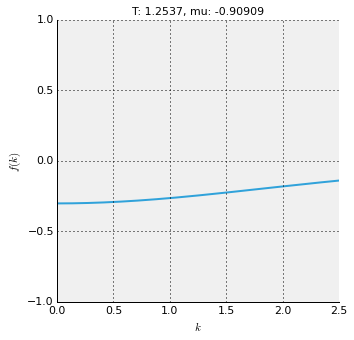
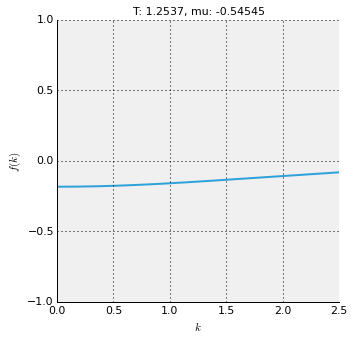
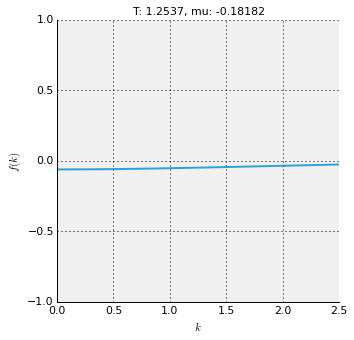
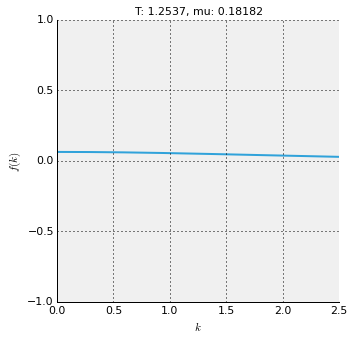
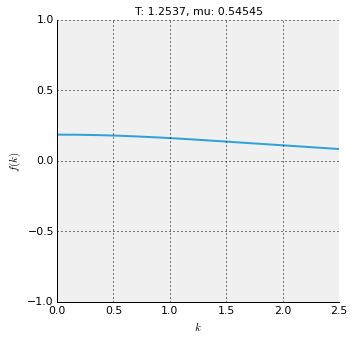
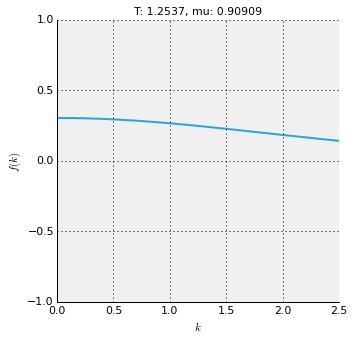
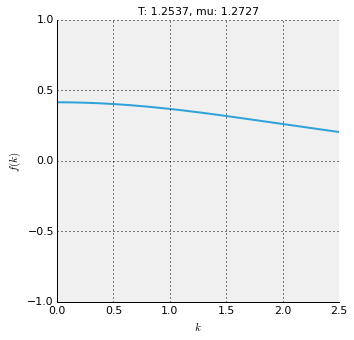
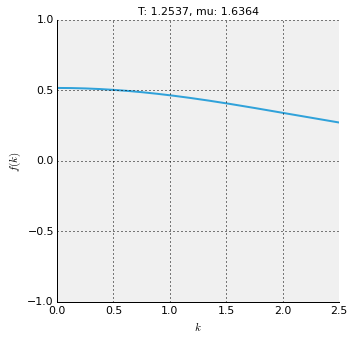
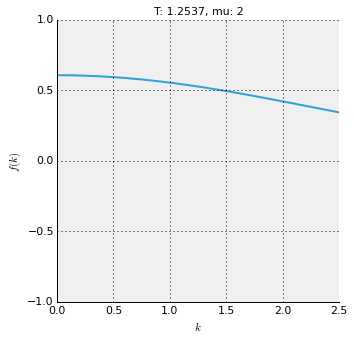
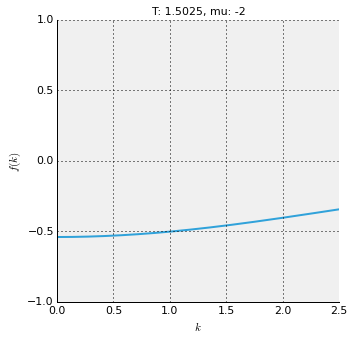
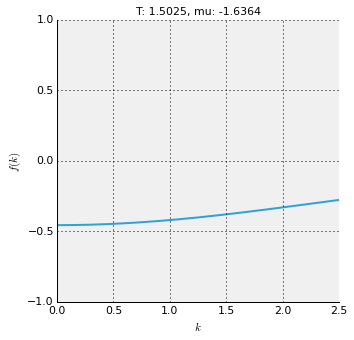
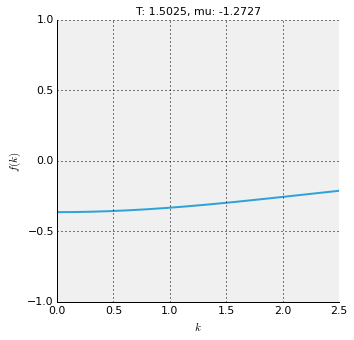
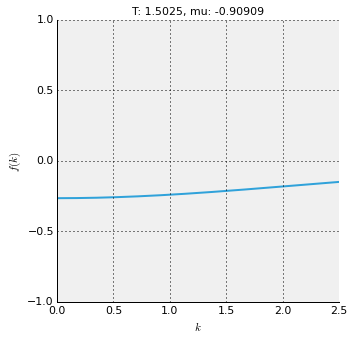
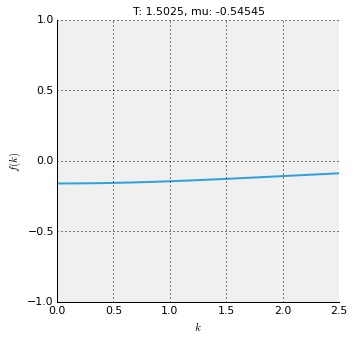
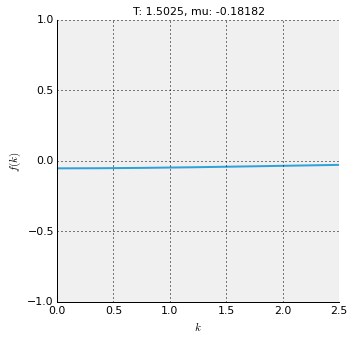
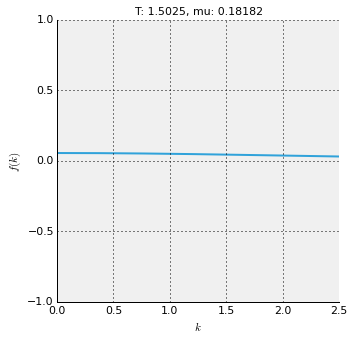
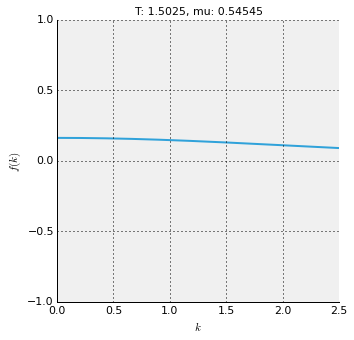
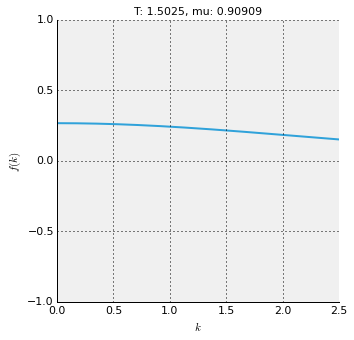
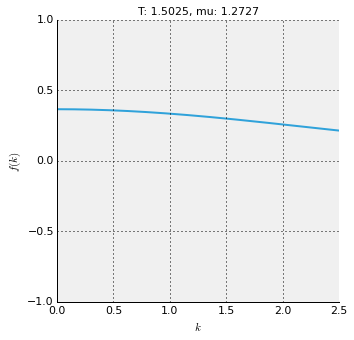
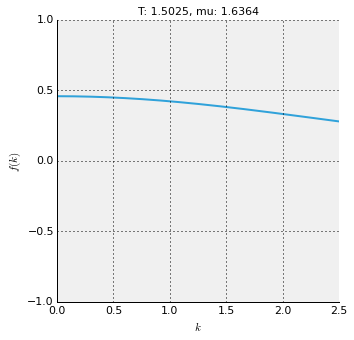
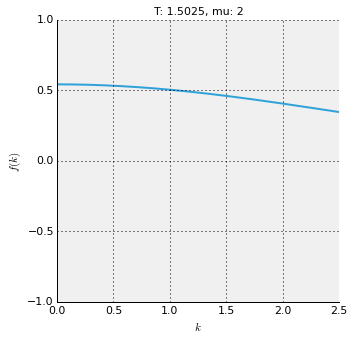
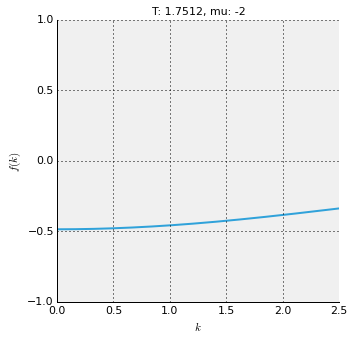
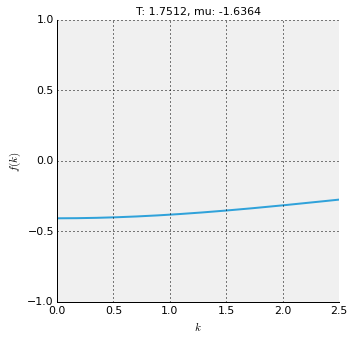
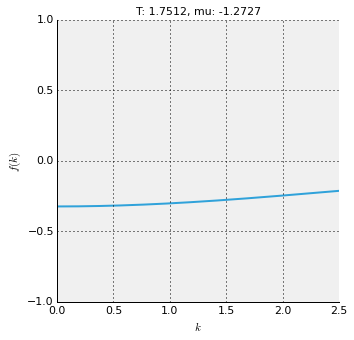
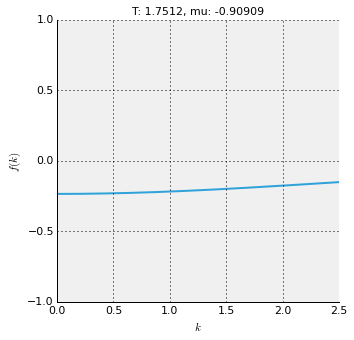
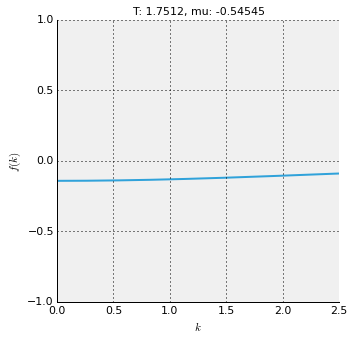
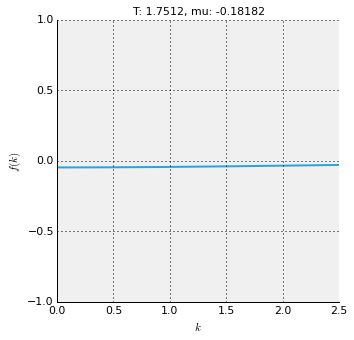
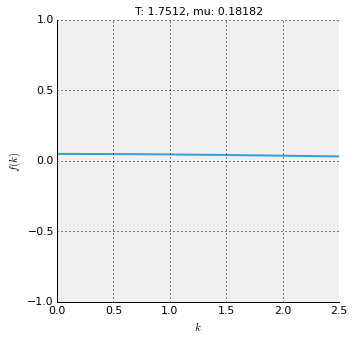
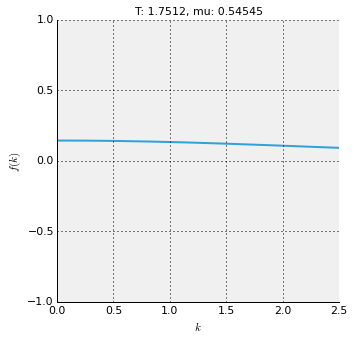
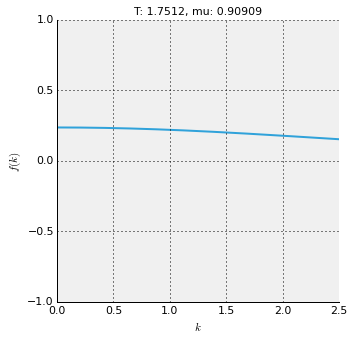
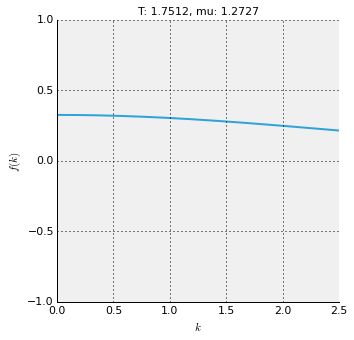
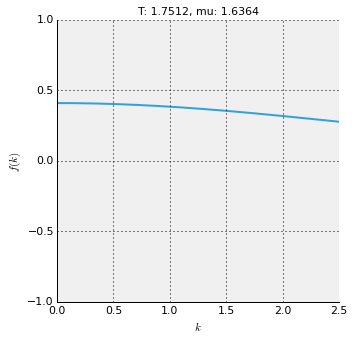
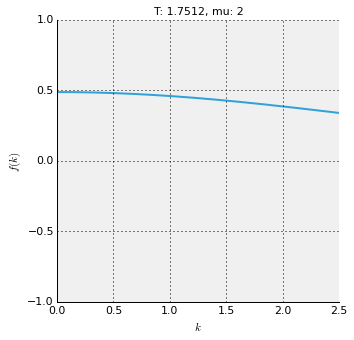
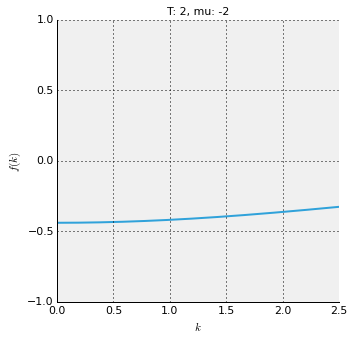
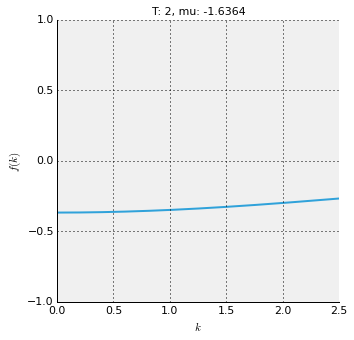
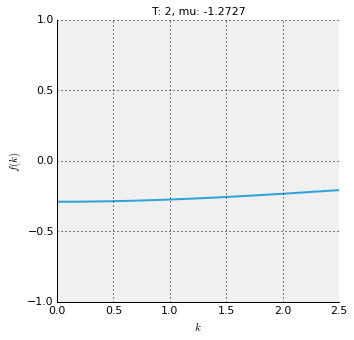
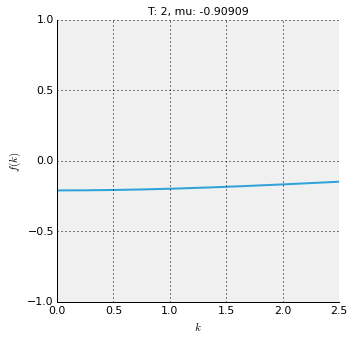
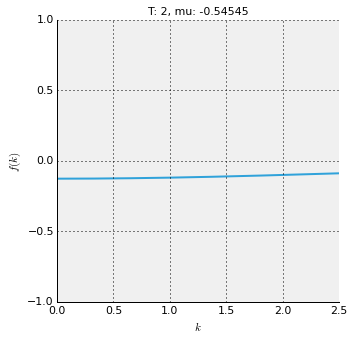
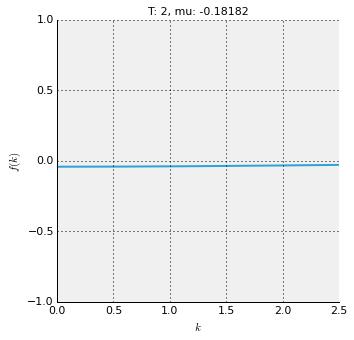
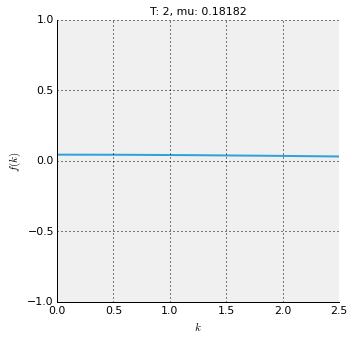
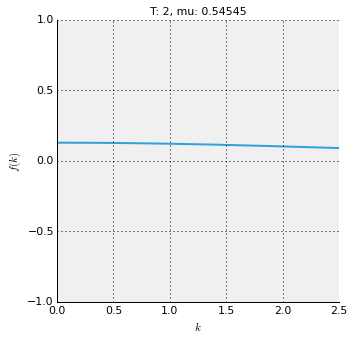
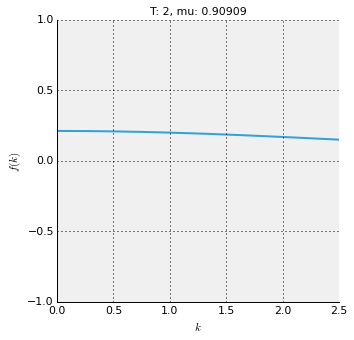
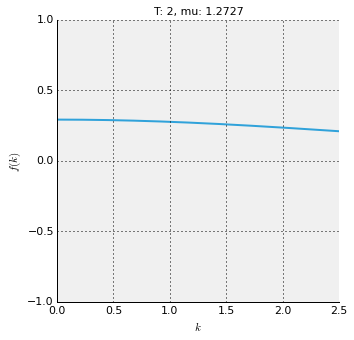
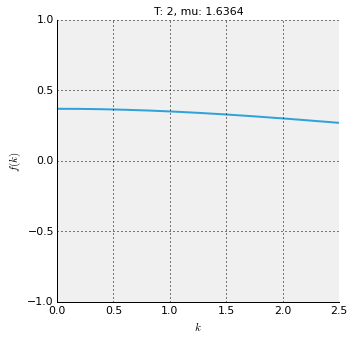
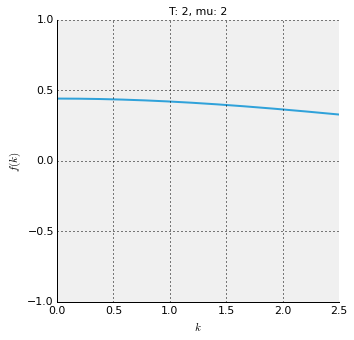

In [5]:
%%output size=140

def f(k, T=1, mu=1.1):
    """Return the Fermi distribution"""
    beta = 1./T
    Ek = np.sqrt(k**2 + 1)
    return 1./(1+np.exp(beta*(Ek-mu))) - 1./(1+np.exp(beta*(Ek+mu)))

Ts = np.linspace(0.01,2,9)
mus = np.linspace(-2,2,12)
ks = np.linspace(0,2.5,200)

dimensions = ['T', 'mu']
keys = [(T, mu) for T in Ts for mu in mus]
args = dict(kdims=['$k$'], vdims=['$f(k)$'])
items = [(k, hv.Curve((ks, f(ks, *k)), **args)) for k in keys]
hv.HoloMap(items, kdims=dimensions)

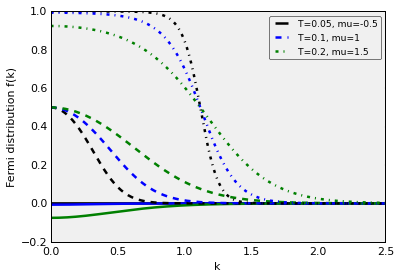

In [6]:
k = np.linspace(0,2.5,200)
ax = plt.gca()
ax.set_color_cycle (['k', 'b', 'g'])
for n_mu, mu in enumerate([-0.5, 1, 1.5]):
    ls = ['-', '--', '-.'][n_mu]
    for n_T, T in enumerate([0.05, 0.1, 0.2]):
        args = dict(ls=ls)
        if n_T == n_mu:
            args['label'] = 'T={}, mu={}'.format(T, mu)
        plt.plot(k, f(k, mu=mu, T=T), **args)
plt.xlabel('k')
plt.ylabel('Fermi distribution f(k)')
plt.legend(loc='best');

As the temperature gets smaller and smaller, the distribution becomes sharper and sharper until at $T=0$, one has a step function at $k=k_F$.  If $\abs{\mu} \leq mc^2$, then the distribution vanishes, but for finite $T$, there is a finite occupation for any positive $\mu$.

### 2.2.2 Equilibrium with Nuclear Matter

The total energy density of a gas of protons, neutrons, electrons, and muons is:

$$
  \mathcal{E}(n_n, n_p, n_e, n_\mu) = \mathcal{E}_n(n_n, n_p)
  + \mathcal{E}_e(n_e) + \mathcal{E}_{\mu}(n_\mu) = 
  \mathcal{E}(n_n, n_p, n_l) = \mathcal{E}_n(n_n, n_p) + \mathcal{E}_l(n_l)
$$

where $\mathcal{E}_n(n_n, n_p)$ is the nuclear equation of state, and we have used the condition of chemical equilibrium to determine the optimal ratio of electrons to muons as discussed in the previous section.

In general, one should consider as fixed quantities which are conserved.  In this case, total baryon number (density) $n_B$ is a conserved quantity (at least in terms of the $\beta$-decay reactions), so it makes sense to describe the system in terms of $n_B$ and the proton fraction $x_p = n_p/n_B$ so that $n_p = x_pn_B$, and $n_n = (1-x_p)n_B$.  Electric neutrality still requires $n_p = n_l$, so minimizing the energy density with respect to the proton fraction gives the $\beta$-equilibrium condition:

$$
  \mu_p - \mu_n = \mu_l = \mu_e = \mu_\mu, \qquad
  \mu_{n,p} = \pdiff{\mathcal{E}_n(n_n, n_p)}{n_{n,p}}. \tag{$\beta$-equilibrium}
$$

Again – the appropriate chemical equilibrium conditions apply.

Let's now take stock of what we have.  First we need to fix the overall baryon density $n_B$: this is fixed by the external potential – gravity in the case of a neutron star – which sets the corresponding chemical potential $\mu_B = \partial\mathcal{E}/\partial n_B$.  For this fixed density, one minimizes the ratio of the various other components satisfying $n_B = n_p + n_n$, and the neutrality condition $n_p = n_l = n_e + n_\mu$.  These minimizations give the chemical equilibrium conditions that $\mu_p - \mu_n = \mu_l = \mu_e = \mu_\mu$.  Now, the chemical potential difference $\mu_p - \mu_n = \partial \mathcal{E}_n(n_B, x_p)/\partial x_p$ is a function of $n_B$ and the proton fraction.  Similarly, the lepton chemical potential $\mu_l = \mathcal{E}_{l}'(n_l)$ is a function of $n_l = n_p = x_pn_B$.  Hence, the $\beta$-equilibrium condition provides an equation that determines the proton fraction at a fixed baryon densith:

$$
  \mu_p(n_B, x_p) - \mu_p(n_B, x_p) = \mu_l(x_pn_B) = \mathcal{E}_{l}'(x_pn_B) \quad
  \Longrightarrow \quad
  x_p = x_p(n_B). \tag{proton fraction}
$$

Since we know the form of $\mu_e = \mu_l(n_p)$, we can express this as

$$
  n_p = x_p n_B \approx \begin{cases}
    \frac{\mu_e^3}{3\pi^2\hbar^3c^3} & \mu_e < m_\mu c^2,\\
    \frac{\mu_e^3}{3\pi^2\hbar^3c^3}\left(1 + \left(1 - \frac{m_\mu^2 c^4}{\mu_e^2}\right)^{3/2}\right)
    &  \mu_e > m_\mu c^2,
  \end{cases}, \qquad
  \mu_e = \mu_p(n_B, x_p) - \mu_n(n_B, x_p).
$$

The actual form of the last equation depends on the form of the nuclear equation of state, which we will discuss below.

### 2.2.3 Energy-per-Particle and Chemical Potentials

It is common to express the nuclear equation of state in terms of the energy-per-particle or energy-per-baryon $\varepsilon_n(n_B, x_p) = \mathcal{E}(n_n, n_p)/n_B$ since this is a minimum at saturation as we discuss below.  Here are the various thermodynamic relationships for nuclear matter:

$$
  \varepsilon)n(n_B, x_p) = \frac{\mathcal{E}_n(n_n, n_p)}{n_n + n_p}, \qquad
  \pdiff{x_p}{n_n} = -\frac{x_p}{n_B}, \qquad
  \pdiff{x_p}{n_p} = \frac{1-x_p}{n_B},\\
  \begin{aligned}
    \mu_n &= \pdiff{\mathcal{E}_n(n_n, n_p)}{n_n} 
           = \varepsilon_n(n_B, x_p) 
             + n_B\pdiff{\varepsilon_n(n_B, x_p)}{n_B} 
             - x_p\pdiff{\varepsilon_n(n_B, x_p)}{x_p},\\
    \mu_p &= \pdiff{\mathcal{E}_n(n_n, n_p)}{n_p} 
           = \varepsilon_n(n_B, x_p) 
             + n_B\pdiff{\varepsilon_n(n_B, x_p)}{n_B} 
             + (1-x_p)\pdiff{\varepsilon_n(n_B, x_p)}{x_p}.
  \end{aligned}
$$

In equilibrium, the total energy density of homogeneous matter can be expressed as $\mathcal{E} = \mathcal{E}_n(n_n, n_p) + \mathcal{E}_l(n_p)$.  In $\beta$ equilibrium, this will be minimized with respect to the proton fraction $\partial\mathcal{E}/\partial{x_p} = 0$ which allows us to define the baryon chemical potential $\mu_B = \partial\mathcal{E}/\partial{n_B}$:

$$
  \mathcal{E}(n_n, n_p) = \mathcal{E}_n(n_n, n_p) + \mathcal{E}_l(n_p)
    = \mathcal{E}_n\bigl((1-x_p)n_B, x_pn_B\bigr) + \mathcal{E}_l\bigl(x_pn_B\bigr)\\
  0 = \pdiff{\mathcal{E}}{x_p} = n_B(\mu_p - \mu_n + \mu_l)\\
  \mu_B = \pdiff{\mathcal{E}}{n_B} = (1-x_p)\mu_n + x_p\mu_p + x_p\mu_l = \mu_n.
$$

The last relationship shows that, in $\beta$-equilibrium,  $\mu_B = \mu_n$.  The proton chemical potential differes $\mu_p = \mu_B - \mu_l \neq \mu_B$ due to the Coulomb interaction.

### 2.2.4 Pressure

We now address one final point: the pressure of this homogeneous state $P$.

$$
  P = P_n + P_l = \mu_n n_n + \mu_p n_p  - \mathcal{E}_{n}(n_n, n_p) + \mu_ln_l - \mathcal{E}_{l}(n_l).
$$

Note that although the full formula includes $\mu_e n_e + \mu_\mu n_mu - \mathcal{E}_e(n_e) - \mathcal{E}_\mu(n_\mu)$ but chemical equilibrium requires $\mu_e = \mu_\mu = \mu_l$ so this can be expressed in terms of the single combination $\mu_l n_l - \mathcal{E}_{l}(n_l)$.

The form of this can be deduced from the energy per baryon as follows:

$$
  \varepsilon(n_B, x_p) = \frac{\mathcal{E}}{n_B} =  \frac{\mathcal{E}_n\bigl((1-x_p)n_B, x_pn_B\bigr) + \mathcal{E}_{l}(x_pn_B)}{n_B}, \\
  0 = \pdiff{}{x_p}\varepsilon(n_B, x_p) = \mu_p - \mu_n + \mu_l, \\
  P = n_B^2 \pdiff{}{n_B}\varepsilon(n_B, x_p) =
  n_B^2 \left(
    \frac{(1-x_p)\mu_n + x_p\mu_p + x_p\mu_e}{n_B} - \frac{\mathcal{E}}{n_B^2}\right)
    = n_B\mu_n - \mathcal{E}.
$$

The last relationship holds because $\mu_n = \mu_B$ is the baryon chemical potential.

# 3. Neutron Star Equation of State

This notebook describes a simplified method of calculating the equation of state in the crust of a neutron star.  It uses the so-called compressible liquid drop model (CLDM) to decribe nuclei in the crust and makes a few approximations that should be expanded in a realistic calculation.

1. We assume that the nuclei have equal numbers of protons and neutrons.  As such, our nuclear equation of state depends only on the total "baryon" density $n_B = n_p + n_n$.  In reality, there are more neutrons than protons and this is described by an additional dependence on the proton fraction $x=n_p/n_B$ which we fix here to $x=1/2$.  In what follows, we thus simply refer to a single density $n = n_B = 2n_n = 2n_p$.

# 4. Saturation

The starting point for a thermodynamic exploration is to use the Hemlholtz free-energy $F = E - TS$.  We will be considering low temperatures (on the nuclear scale) and so consider the limit $T=0$ in which case we can work with the energy.  Thus, we shall talk about minimizing the energy when one should really generalize this to the free energy $F$ at finite temperature.

We start with the notion of "saturation".  The nuclear equation of state has a minimum energy at a finite density.  This means that, thermodynamically, the density inside a nucleus tends to a constant finite value called the "saturation density" $n_0 \approx 0.16$fm$^{-3}$.  Thus, if the volume of the nucleus is $V$, then the atomic number $A = nV$.  In the (non-compressible) liquid drop model (LDM) $n=n_0$ is constant and fixed and the energy density of nuclear matter at this density is expressed through the constant $\epsilon_0 \approx -16$MeV which is the binding energy per nucleon $\epsilon_0 = E(A)/A = \mathcal{E}_n(n_0)/n_0$.  Thus, in the LDM, the binding energy $E_n(A)$ and energy density $\mathcal{E}_n/V$ of a nucleus has the form:

$$
  E(A) \approx \epsilon_0 A, \qquad
  \mathcal{E}_n(n_0) \approx \frac{E(A)}{V} = \frac{\epsilon_0 A}{A/n_0} = n_0\epsilon_0.
$$

In the CLDM, one must specify the energy density $\mathcal{E}_n(n)$ as a function of arbitrary $n$ to allow for the density to change.  We must thus introduce an additional parameter $K \approx 250$MeV called the compressibility.  The conventional parametrization of the nuclear equation of state is expressed in terms of the energy per nucleon:

$$
  \frac{E}{A} = \mathcal{E_n}(n){n} = \epsilon_0 + \frac{K}{2}\delta^2, \qquad
  \delta = \frac{n - n_0}{3n_0}
$$

where $\delta$ expresses the deviation from the saturation density.

## 4.1 Thermodynamic Equilibrium

Now consider a nucleus of volume $V$ in a box (cell) of volume $V_c > V$.  Let $w=V/V_c$ be the "volume fraction".  To determine the thermodynamic equlibirum, we can minimize the energy as a function of particle number $A = Vn$ at fixed total volume $V_c$ with respect to the size of the nucleus expressed in terms of $w$:

$$
  E(A) = V\mathcal{E}_n(n) = wV_c\mathcal{E}(A/wV_c),\\
  V_c^{-1}\pdiff{E}{w} = 0 = \mathcal{E}_n(n) - \frac{A}{wV_c}\mathcal{E}'_n(n) 
  = \mathcal{E}_n(n) - \mu_n n = -P_n(n),
$$

where we have introduced $\mu_n = \mathcal{E}'(n)$ as the baryon chemical potential in the nucleus.  Note that we have introduced a factor of $V_c^{-1}$ to show that this implies zero pressure $P_n(n) = \mu_n n - \mathcal{E}_n(n)$ in the nucleus is zero, matching the zero-pressure of the surrounding empty space (vaccuum).

Note that this implies that the energy per nucleon is minimized $\partial(\mathcal{E}_n/n)\partial n = 0$ in a saturating nucleus, not the energy density $\mathcal{E}_n(n)$.  This is a consequence of the Maxwell construction of phase equilibrium between the vacuum and the nucleus.  However, the total energy density of the box *is* minimized since this is proportional to the energy per baryon:

$$
  \mathcal{E} = \frac{E}{V_c} = w\mathcal{E}_n(n) = \frac{A}{V_c}\frac{\mathcal{E}_n(n)}{n}.
$$

Moral: in a fixed total volume, the energy density *of the total volume* is minimized, but not the energy-density of a given phase when there may be phase-coexistance.  The latter must be determined by allowing material to redistribute to satisfy chemical (we shall discuss this below) and mechanical equilibrium in terms of equal chemical potentials $\mu$ and pressures $P$.

We now do this numerically and make some plots:

Populating the interactive namespace from numpy and matplotlib


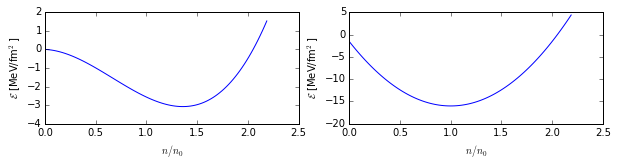

In [1]:
# The following line sets up plotting in the notebook and imports some useful 
# packages like numpy and matplotlib.  This could be done manually in regular
# python with 
# from matplotlib import pyplot as plt
# import numpy as np
%pylab inline --no-import-all
import scipy.optimize   # Useful numerical minimization tools
sp = scipy

# Choose natural units
MeV = 1.0
fm = 1.0
c = 1.0

n0 = 0.16/fm**3   # Saturation density
e0 = -16*MeV      # Saturation energy per baryon
K0 = 260*MeV      # Nuclear compressibility
alpha = 1.0/137.03599913815450977  # Fine structure constant
hbarc = 197.326972 * MeV * fm
m_n = 939.565379*MeV/c**2  # Neutron mass
m_p = 938.272046*MeV/c**2  # Proton mass


def energy_per_baryon(n, n0=n0, e0=e0, K0=K0, d=0):
    """Return the energy per baryon in nuclear matter.
    
    Compute the d'th derivative.
    """
    delta = (n - n0)/3.0/n0
    if d == 0:
        return e0 + K0/2.0 * delta**2
    elif d == 1:
        return K0*delta/3.0/n0
    else:
        raise NotImplementedError

def energy_density(n, n0=n0, e0=e0, K0=K0, d=0):
    """Return the energy density of nuclear matter."""
    if d == 0:
        return n*energy_per_baryon(n)
    elif d == 1:
        return energy_per_baryon(n) + n*energy_per_baryon(n, d=1)
    else:
        raise NotImplementedError    

ns = np.linspace(0, 0.35, 100)   # Linearly spaced array of points.
E_ns = energy_density(ns)
E_As = energy_per_baryon(ns)
plt.figure(figsize=(10, 2))
plt.subplot(121)   # subplot(abc) makes an axb grid of plots and activates plot number c
plt.plot(ns/n0, E_ns);plt.xlabel('$n/n_0$');plt.ylabel('$\mathcal{E}$ [MeV/fm$^2$]')
plt.subplot(122)
plt.plot(ns/n0, E_As);plt.xlabel('$n/n_0$');plt.ylabel('$\mathcal{E}$ [MeV/fm$^2$]')

Notice that at saturation density, the energy per baryon (right) is minimized, not the energy density.  Now we perform the minimization numerically:

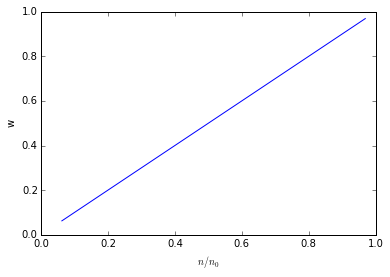

In [169]:
def total_energy_density(w, n_b):
    """Return the energy density of the box with density fixed 
    volume fraction `w` and total baryon density `n_b`."""
    n = n_b/w
    return w*energy_density(n)

def f(x, n_b):
    """Function to minimize.  This takes a vector of arguments `x`"""
    # Here we unpack the arguments to give them meaningful names.
    # Right now there is a single argument, but later we will do a more
    # complex minimization.
    w, = x  # The comma here is to "unpack" x.
    return total_energy_density(w=w, n_b=n_b)

x0 = [0.5]   # initial guess

n_bs = np.linspace(0.01, 0.155, 100)
ws = []
for n_b in n_bs:
    # The following runs one of the scipy minimizers.  The res
    # object returned has lots of information.
    res = sp.optimize.minimize(f, x0=x0, args=(n_b,))
    if res.success:
        w, = res.x
        ws.append(w)
    else:
        raise Exception(res)

plt.plot(n_bs/n0, ws);plt.xlabel('$n/n_0$');plt.ylabel('w')

Here we see how the volume fraction of the nucleus increases as a function of the total baryon density in the box.  Numerically we will have problems at the boundaries unless we give some constraints to the minimization since $0\leq w \leq 1$.  Here is how we can provide boundaries:

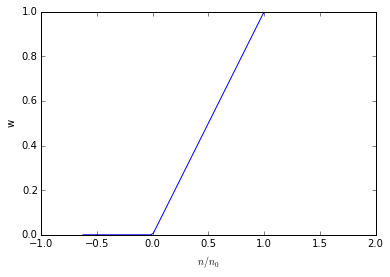

In [170]:
x0 = [0.5]   # initial guess
bounds = [(1e-12, 1)]
n_bs = np.linspace(-0.1, 0.3, 100)
ws = []
for n_b in n_bs:
    # The following runs one of the scipy minimizers.  The res
    # object returned has lots of information.
    res = sp.optimize.minimize(f, x0=x0, args=(n_b,), bounds=bounds)
    if res.success:
        w, = res.x
        ws.append(w)
    else:
        raise Exception(res)

plt.plot(n_bs/n0, ws);plt.xlabel('$n/n_0$');plt.ylabel('w')

Another approach is to enforce the constraint via Lagrange multipliers.

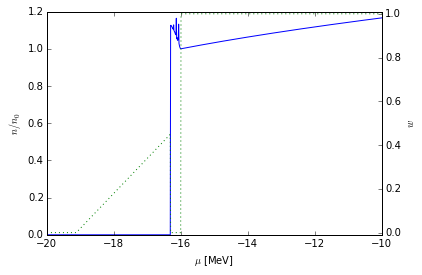

In [214]:
def f(x, mu):
    """Function to minimize.  This takes a vector of arguments `x`"""
    n, w = x  # The comma here is to "unpack" x.
    n_b = w*n
    return w*energy_density(n) - mu * n_b

def df(x, mu):
    """Derivatives"""
    n, w = x  # The comma here is to "unpack" x.
    df_dn = w*energy_density(n, d=1) - mu * w
    df_dw = energy_density(n) - mu * n
    return np.asarray([df_dn, df_dw])

assert scipy.optimize.check_grad(f, df, [0.15, 0.4], -15) < 1e-6

x0 = [0.16, 0.5]   # initial guess
bounds = [(0, None), (0, 1)]
mus = np.linspace(-20.0, -10.0, 1000)
xs = []
for mu in mus:
    # The following runs one of the scipy minimizers.  The res
    # object returned has lots of information.
    res = sp.optimize.minimize(f, x0=x0, args=(mu,), jac=df,
                               bounds=bounds)
    #x0 = res.x
    xs.append(res.x)
    if not res.success:
        print mu, res

# The following is a slick way of unpacking the array of xs.
# Here is how it works.  First, we accumulated a list of tuples
# xs = [(n0, w0), (n1, w1), (n2, w2), ...]
# Next we turn this into a numpy array with np.asarray()
# xs = [[n0, w0], 
#       [n1, w1], 
#       [n2, w2], 
#       ...     ]
# The shape of this array is nx2 (i.e. n rows and 2 columns).
# In order to unpack this into ns and ws, we need the length 2
# index first, so we take the transpose np.asarray(x).T.  This
# is now 2xn and unpacking it sets the first row to xs and the
# second row to ws.
#
# In practise, I just do this by trial and error.  First I try
# to unpack ns, ws = np.asarray(xs).  If that fails, I remember
# to add the transpose.  This strategy also works in other places.
#
# Note: there is a way of doing this without numpy, but it is harder
# for me to explain:
#
# ns, ws = zip(*xs)
#
ns, ws = np.asarray(xs).T
plt.plot(mus / MeV, ns/n0);plt.xlabel(r'$\mu$ [MeV]');plt.ylabel('$n/n_0$')
plt.twinx();plt.plot(mus / MeV, ws, 'g:');plt.ylabel('$w$');plt.ylim(-0.01, 1.01);

Here we see that for sufficiently negative chemical potentials, either the volume fraction is zero or the density is zero, meaning that the system has no nucleus: the negative chemical potential has esentially excluded all nucleons.  (There is some strange numerical behaviour due to the fact that for negative chemical potentials, the system is singular.  This should straighten itself out once we allow the system more freedom to have a uniuque solution).

## 4.2 Coulomb Interaction

The next step is to include the Coulomb interactions.  The physical situation is that of a lattice of nuclei, so the full calculation needs to account for the structure of the lattice.  However, once can obtain a reasonable approximation (typically accurate to a few percent) using a "Wigner-Seitz cell".  This amounts to placing the nucleus at the center of a spherical shell with the same volume $V_c = \tfrac{4\pi}{3}r_c^3$ as the corresponding unit cell of the true lattice.

Here is the energy of a solid uniformly charged sphere of charge $Z$ and radius $r$:

$$
  E = \hbar c \int_0^r \rho 4\pi r'^2 \d{r'} \; \rho V_{r} \frac{\alpha}{r'}
    = \alpha \hbar c \int_0^r Z\frac{4\pi r'^2 \d{r'}}{\frac{4}{3}\pi r^3} \; 
  Z\frac{r'^3}{r^3}\frac{1}{r'}
    = \frac{3\alpha \hbar c Z^2}{r^6} \int_0^r \; r'^4 \d{r'}
    = \alpha \hbar c \frac{3Z^2}{5r}
$$

Now we consider an inner sphere with total charge density $e (n_p - n_e) = eQ_r/V_r$ for $0 < r' < r$, and an outer sphere with charge density $-e n_e$ for $r < r' < R$.  Let $Z = Q_e = n_e V_R$ which must cancel $Z = n_pV_r$ so that $Q_r = (n_p - n_e)V_r = Z(1 - V_r/V_R) = Z(R^3-r^3)/R^3$.  The total charge enclosed in a sphere of radius $r'$ is:

$$
  Q_{r'} = \begin{cases}
    Q_r\cfrac{r'^3}{r^3} & r' \leq r,\\
    Q_r\cfrac{R^3 - r'^3}{R^3-r^3} & r < r' \leq R.
  \end{cases}
$$

From this:

$$
  E_C = 4\pi \alpha \hbar c (n_p - n_e) \int_0^r\; r'^2 \d{r'} \frac{Q_{r'}}{r'} 
      - 
      4\pi \alpha \hbar c n_e \int_r^{R}\; r'^2 \d{r'} \frac{Q_{r'}}{r'}\\
  = \alpha \hbar c \frac{3Z^2}{5 r} \left(1 -  \frac{3r}{2R} + \frac{r^3}{2R^3}\right)
  = \alpha \hbar c \frac{3Z^2}{5 r} f_3\left(\frac{r^3}{R^3}\right), \\
  f_3(w) = 1 - \frac{3}{2}w^{1/3} + \frac{1}{2}w.
$$

where we follow the notation of Haensel et al. (2007).  This is the Coulomb energy of a Wigner-Seitz cell, and must be added to our calculation of the total energy.

In addition, we must add the energy density of the electron gas with uniform density $n_e$.  This may be approximated in the ultra-relativistic limit where we can neglect the mass of the electron.  (The typical energy scale is on the order of $10$MeV while the electron mass is $0.511$MeV so this is a fairly good approximation.)  We simply integrate the energy density $\sqrt{p^2c^2 + m^2c^4} \approx pc$ up to the Fermi momentum $\hbar k_F$ (with a factor of 2 in front to count for the two spin states of the electron):

$$
  n_e = 2\int 1 \frac{\d^3{k}}{(2\pi)^3} 
      = 2\int_k^{k_F} \frac{4\pi k^2}{(2\pi)^3} \d{k} 
      = \frac{k_F^3}{3\pi^2},\\
  \mathcal{E}_e(n_e) = 2\int \hbar c k \frac{\d^3{k}}{(2\pi)^3} 
                     = 2\int_k^{k_F} \hbar c k \frac{4\pi k^2}{(2\pi)^3} \d{k} 
                     = \frac{\hbar c k_F^4}{4\pi^2}.
$$

In [7]:
def coulomb_energy(n_p, w, r_p):
        """Return the Coulomb energy.
        
        Arguments
        ---------
        n_p : Proton density in nucleus
        w : Volume fraction
        r_p : Radius of nucleus (protons)
        """
        V_p = 4./3.*np.pi * r_p**3
        Z = V_p * n_p
        f3 = 1.0 + w/2 - 3./2*w**(1./3.)
        return (alpha * hbarc * 3./5. * Z**2 / r_p * f3)

def electron_energy_density(n_e):
    """Return the electron energy density."""
    k_F = (3 * np.pi**2 * n_e)**(1./3.)
    E = hbarc * k_F**4/4.0/np.pi**2
    return E

def f(x, mu):
    """Total energy density."""
    n, w, r_p = x
    n_p = n/2.0
    n_e = w*n_p  # Neutrality constraint
    n_b = w*n
    V_p = 4./3.*np.pi * r_p**3
    V_c = V_p / w
    return (w*energy_density(n) 
            + electron_energy_density(n_e) 
            + coulomb_energy(n_p=n_p, w=w, r_p=r_p) / V_c 
            - mu * n_b)

In [34]:
x0 = [0.16/fm**3, 0.5, 7*fm]   # initial guess
bounds = [(0, None), (0, 1), (0, None)]
mus = np.linspace(60.0, 120.0, 1000)
xs = []
for mu in mus:
    # The following runs one of the scipy minimizers.  The res
    # object returned has lots of information.
    res = sp.optimize.minimize(f, x0=x0, args=(mu,), tol=1e-8,
                               bounds=bounds)
    xs.append(res.x)
    if not res.success:
        print mu, res
n_ps, ws, r_ps = np.asarray(xs).T
n_bs = ws * n_ps

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars


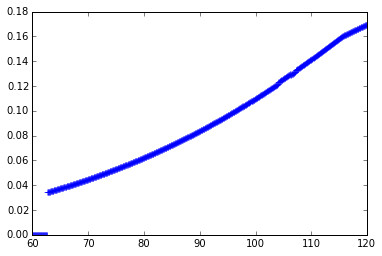

In [35]:
plt.plot(mus, n_bs, '+')

# 5. Surface Energy

We have neglected an important component to the nuclear equation of state - the surface energy.  In general this will behave as $E_s \propto \sigma r_p^2$ where $\sigma \approx 1$MeV is the surface tension of nucleus.  Details of the surface properties depend on the detailed structure of the nucleus, but one can fairly easily encorporate these effects in the nuclear equation-of-state by noting that only the Coulomb and surface energies depend explicitly on the radius $r_p$ in the energy density:

$$
  \mathcal{E} = w\mathcal{E}_n(n_p) + \mathcal{E}_e(wn_p) + \mathcal{E}_s(r_p) + \mathcal{E}_c(n_p, r_p, w), \\
  \mathcal{E}_s \propto \frac{\sigma}{r_p}, \qquad
  \mathcal{E}_c \propto \frac{Z^2}{r_p^4} \propto n_p^2 r_p^2.
$$

Here we hold $n_p$ and $w$ fixed while varying the radius $r_p$.  Thus, the minimization condition $\partial \mathcal{E}/\partial r_p = 0$ gives the following "virial" theorem valid at the minimum:

$$
  \mathcal{E}_s = 2\mathcal{E}_c.
$$

Note that this is valid for any surface energy term as long as it scales as the area so that the surface contribution to the energy density of the nucleus scales as $r_p^{-1}$.

In [36]:
def f(x, mu):
    """Total energy density including surface effects."""
    n, w, r_p = x
    n_p = n/2.0
    n_e = w*n_p  # Neutrality constraint
    n_b = w*n
    V_p = 4./3.*np.pi * r_p**3
    V_c = V_p / w
    return (w*energy_density(n) 
            + electron_energy_density(n_e) 
            + 3*coulomb_energy(n_p=n_p, w=w, r_p=r_p) / V_c 
            - mu * n_b)

x0 = [0.16/fm**3, 0.5, 7*fm]   # initial guess
bounds = [(0, None), (0, 1), (0, None)]
mus = np.linspace(60.0, 120.0, 1000)
xs = []
for mu in mus:
    # The following runs one of the scipy minimizers.  The res
    # object returned has lots of information.
    res = sp.optimize.minimize(f, x0=x0, args=(mu,), tol=1e-8,
                               bounds=bounds)
    xs.append(res.x)
    if not res.success:
        print mu, res
n_ps, ws, r_ps = np.asarray(xs).T
n_bs = ws * n_ps

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


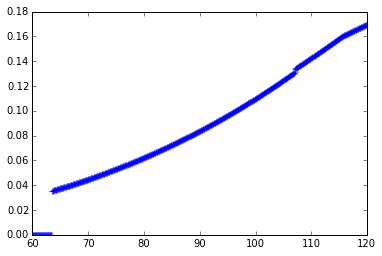

In [37]:
plt.plot(mus, n_bs, '+')

# 6. Liquid Drop Model (LDM)

We start with what is known as the liquid drop model (LDM).  The model here is that nuclei occupy a spherical volume $V = \tfrac{4}{3}\pi r^3$ with constant density $n_0 \approx 0.16$fm$^{-3}$ and energy per particle $\epsilon_0 + S(n_n - n_p)^2/n_0^2$ where $\epsilon_0 \approx 0.15$MeV per nucleon and $S\approx 24$MeV is the symmetry energy.  The surface of the drops has some tension $\sigma \approx 1$MeV$/$fm$^2$ which gives energy $E_s = \sigma 4\pi r^2$.  To this we add the Coulomb energy $\alpha \hbar c 3Z^2/5r$ of a charged sphere with radius $r$ and total charfe Z.  Thus, for a nucleus with $Z$ protons and $A = N+Z$ neutrons we have:

$$
  Z \approx n_pV = n_p\frac{4}{3}\pi r^3, \qquad
  N \approx  n_nV = n_n\frac{4}{3}\pi r^3, \qquad
  n_n + n_p \approx  n_0, \qquad
  r = \left(\frac{3A}{4\pi n_0}\right)^{1/3},\\
  E \approx \left(\epsilon_0 + S\frac{(n_n - n_p)^2}{n_0^2}\right)A 
    + \sigma 4\pi r^2
    + \alpha \hbar c \frac{3Z^2}{5r}.
$$

This gives the Bethe-Weizsäcker mass formula:

$$
    E \approx \overbrace{a_v}^{-15\mathrm{MeV}} A 
      + \overbrace{a_s}^{16\mathrm{MeV}}A^{2/3}
      + \overbrace{a_C}^{0.75\mathrm{MeV}}\frac{Z^2}{A^{1/3}}
      + \overbrace{a_I}^{24 \mathrm{MeV}}\frac{(N - Z)^2}{A},
$$

where

$$
  a_v \approx \epsilon_0, \qquad
  a_s \approx \sigma 4\pi \left(\frac{3}{4\pi n_0}\right)^{2/3}, \qquad
  a_C \approx \alpha \hbar c \frac{3}{5}\left(\frac{4\pi n_0}{3}\right)^{1/3}, \qquad
  a_I \approx S.
$$

This formular fits all measured nuclear masses with an rms error of about $\chi_E \approx 3.3$MeV per nucleon.

Extending this into the neutron star, we must add a few pieces for the Wigner-Seitz cell which has radius $R$ and volume $V_R$ where the nucleus occupies volume $V_p$.  Here we still assume in the nucleus that $n_n^i + n_p^i = n_0$ and use the notation of $A = n_0V_p$  as the total baryon number of the nucleus (not of the whole cell).  The additional parameter is now the volume fraction $w = V_p/V_R = r^3/R^3$ and we start by expressing the energy density. From the expression above for the nucleus, the energy density acquires an additional factor of the volume fraction in addition to the factor $n_0 = A/V_p$.  In addition, the Coloumb energy recieves a modifiction from the electrons, and we must at the electron energy density and that of the external neutrons:

$$
  E_C = \alpha \hbar c \frac{3Z^2}{5 r} f_3\left(\frac{r^3}{R^3}\right), \qquad
  f_3(w) = 1 - \frac{3}{2}w^{1/3} + \frac{1}{2}w, \\
  E_o = \\
  E_e = \hbar c \frac{3}{4}(\frac{9\pi}{4})^{1/3} \frac{Z^{4/3}}{R}.
$$

Noting that $V_R = A/n_0w$ The total energy density is:

$$
  \mathcal{E} = \overbrace{a_v}^{-15\mathrm{MeV}} n_0 w
      + \overbrace{a_s}^{16\mathrm{MeV}}A^{-1/3} n_0 w
      + \overbrace{a_C}^{0.75\mathrm{MeV}}\frac{Z^2}{A^{4/3}} f_3(w)n_0 w
      + \overbrace{a_I}^{24 \mathrm{MeV}}\frac{(N - Z)^2}{A^2} n_0 w
      + (1-w)\mathcal{E}_n(n_n^o)
      + \overbrace{a_e}^{250\mathrm{MeV}} \frac{Z^{4/3}w^{1/3}}{A^{4/3}} n_0 w 
$$

$$
  a_e \approx \frac{3\hbar c (3\pi^2n_0)^{1/3}}{4}
$$

In addition to the previous energy for the nucleus, we must add in addition the energy for the neutron gas outside, add a uniform gas of electrons, and modify the Coulomb energy:



# 7. Problems

## 7.1 Collapse of the Earth

Suppose that the proton mass suddenly became less than the neutron mass so that all of the protons converted to neutrons.  Describe the resulting structure of the earth after it collapsed into a ball of neutrons bu solving the TOV equations.